In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
f1='Tregs_CpGdelta_info_faster.txt_forheatfullinfo.txt_SM51_unique.txt'
f2='Tregs_CpGdelta_info_faster.txt_forheatfullinfo.txt_ranked5oo_comparedUNiq.txt'
df1=pd.read_csv(f1,sep='\t')
df1['SM']='V2 (overfit)'
df2=pd.read_csv(f2,sep='\t')
df2['SM']='Ranked (500CpG)'
df1.head()

,chrom,start,end,Average delta rank,Minimum delta rank,Tregs-Bcell,Tregs-Myloid,Tregs-NK,Tregs-Naive CD4 T,Tregs-Naive CD8 T,...,Tregs-CD8 TCM,Tregs-CD8 TEMRA,Tregs-CD4 TEM,Tregs-CD8 TEM,Minimum delta,Maximum delta,Average delta,(Minimum delta+Average delta)/2,(Minimum delta rank+Average delta rank)/2,SM
0,chr18,13382911,13382913,94,1571,0.840143,0.808375,0.840667,0.767333,0.830667,...,0.7015,0.8500,0.6045,0.8030,0.338500,0.850000,0.744699,0.541599,832.5,V2 (overfit)
1,chr9,136767164,136767166,677,999,0.376857,0.787062,0.751667,0.759333,0.753667,...,0.4050,0.6670,0.5520,0.6765,0.376857,0.787062,0.630281,0.503569,838.0,V2 (overfit)
2,chr2,106107861,106107863,1081,598,0.419750,0.739437,0.768167,0.697500,0.684833,...,0.4630,0.6490,0.4470,0.6035,0.419750,0.768167,0.603674,0.511712,839.5,V2 (overfit)
3,chr6,149480103,149480105,725,1000,0.548125,0.678125,0.696000,0.679667,0.676333,...,0.6200,0.6855,0.5950,0.6525,0.376500,0.696000,0.626048,0.501274,862.5,V2 (overfit)
4,chr8,143321470,143321472,745,985,0.599000,0.442143,0.743500,0.378000,0.632667,...,0.7355,0.6935,0.6465,0.6385,0.378000,0.752333,0.624195,0.501097,865.0,V2 (overfit)


In [170]:
df1.shape

(209, 22)

In [171]:
mergedDF = pd.concat([df1, df2], axis=0)
mergedDF.shape

(437, 22)

In [172]:
#mergedDF['col'] = (len(df1)*(0,) + len(df2)*(1,))
mergedDF.shape

(437, 22)

In [173]:
mergedDF

,chrom,start,end,Average delta rank,Minimum delta rank,Tregs-Bcell,Tregs-Myloid,Tregs-NK,Tregs-Naive CD4 T,Tregs-Naive CD8 T,...,Tregs-CD8 TCM,Tregs-CD8 TEMRA,Tregs-CD4 TEM,Tregs-CD8 TEM,Minimum delta,Maximum delta,Average delta,(Minimum delta+Average delta)/2,(Minimum delta rank+Average delta rank)/2,SM
0,chr18,13382911,13382913,94,1571,0.840143,0.808375,0.840667,0.767333,0.830667,...,0.7015,0.8500,0.6045,0.8030,0.338500,0.850000,0.744699,0.541599,832.5,V2 (overfit)
1,chr9,136767164,136767166,677,999,0.376857,0.787062,0.751667,0.759333,0.753667,...,0.4050,0.6670,0.5520,0.6765,0.376857,0.787062,0.630281,0.503569,838.0,V2 (overfit)
2,chr2,106107861,106107863,1081,598,0.419750,0.739437,0.768167,0.697500,0.684833,...,0.4630,0.6490,0.4470,0.6035,0.419750,0.768167,0.603674,0.511712,839.5,V2 (overfit)
3,chr6,149480103,149480105,725,1000,0.548125,0.678125,0.696000,0.679667,0.676333,...,0.6200,0.6855,0.5950,0.6525,0.376500,0.696000,0.626048,0.501274,862.5,V2 (overfit)
4,chr8,143321470,143321472,745,985,0.599000,0.442143,0.743500,0.378000,0.632667,...,0.7355,0.6935,0.6465,0.6385,0.378000,0.752333,0.624195,0.501097,865.0,V2 (overfit)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,chr1,12169533,12169535,744,911,0.623250,0.791187,0.692167,0.724167,0.733500,...,0.6325,0.5555,0.3925,0.5230,0.385500,0.813278,0.624232,0.504866,827.5,Ranked (500CpG)
224,chr19,52645324,52645326,886,769,0.399375,0.694938,0.668000,0.697000,0.654000,...,0.6115,0.6540,0.5340,0.5700,0.399375,0.697000,0.615188,0.507281,827.5,Ranked (500CpG)
225,chr2,213136002,213136004,1473,186,0.617000,0.616625,0.619333,0.611667,0.550333,...,0.5795,0.5765,0.6160,0.5415,0.509500,0.619333,0.585673,0.547586,829.5,Ranked (500CpG)
226,chr17,16166962,16166964,315,1344,0.770125,0.821938,0.816000,0.742000,0.789667,...,0.5320,0.3530,0.5615,0.5285,0.353000,0.821938,0.674162,0.513581,829.5,Ranked (500CpG)


In [174]:
scorecol=['Tregs-Naive CD4 T','Tregs-CD4 TCM','Tregs-CD4 TEM','Tregs-Naive CD8 T','Tregs-CD8 TCM','Tregs-CD8 TEM','Tregs-CD8 TEMRA','SM']

In [175]:
subset=mergedDF[scorecol]

In [176]:
df_melted = pd.melt(subset,'SM')
labels = np.unique(df_melted['SM'])
df_melted.head(10)

,SM,variable,value
0,V2 (overfit),Tregs-Naive CD4 T,0.767333
1,V2 (overfit),Tregs-Naive CD4 T,0.759333
2,V2 (overfit),Tregs-Naive CD4 T,0.697500
3,V2 (overfit),Tregs-Naive CD4 T,0.679667
4,V2 (overfit),Tregs-Naive CD4 T,0.378000
5,V2 (overfit),Tregs-Naive CD4 T,0.682000
6,V2 (overfit),Tregs-Naive CD4 T,0.742000
7,V2 (overfit),Tregs-Naive CD4 T,0.640500
8,V2 (overfit),Tregs-Naive CD4 T,0.900000
9,V2 (overfit),Tregs-Naive CD4 T,0.583500


In [177]:
pairs = []
p_val_dic = {}
for cell in np.unique(df_melted['variable']):
    df_sub = df_melted[df_melted['variable'] == cell]
    v1 = np.array(df_sub[df_sub['SM'] == labels[0]]['value'])
    v2 = np.array(df_sub[df_sub['SM'] == labels[1]]['value'])
    res = mannwhitneyu(v1, v2, alternative="two-sided")
    p_val = res.pvalue
    p_val_dic[cell] = [p_val]
    pairs.append([(cell, labels[0]), (cell, labels[1])])
df_pvals = pd.DataFrame.from_dict(p_val_dic, orient='index', columns=['p-val'])
display(df_pvals)
df_pvals.to_csv('plot1_pvals.txt', sep='\t')

,p-val
Tregs-CD4 TCM,2.697572e-39
Tregs-CD4 TEM,1.203258e-06
Tregs-CD8 TCM,1.757920e-05
Tregs-CD8 TEM,1.090964e-25
Tregs-CD8 TEMRA,1.718142e-22
Tregs-Naive CD4 T,8.002354e-09
Tregs-Naive CD8 T,7.278118e-01


Tregs-CD4 TCM_V2 (overfit) vs. Tregs-CD4 TCM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:2.698e-39 U_stat=6.529e+03
Tregs-Naive CD4 T_V2 (overfit) vs. Tregs-Naive CD4 T_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:8.002e-09 U_stat=1.622e+04
Tregs-CD4 TEM_V2 (overfit) vs. Tregs-CD4 TEM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.203e-06 U_stat=1.742e+04
Tregs-CD8 TCM_V2 (overfit) vs. Tregs-CD8 TCM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.758e-05 U_stat=1.816e+04
Tregs-CD8 TEM_V2 (overfit) vs. Tregs-CD8 TEM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.091e-25 U_stat=3.764e+04
Tregs-CD8 TEMRA_V2 (overfit) vs. Tregs-CD8 TEMRA_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.718e-22 U_stat=3.669e+04
Tregs-Naive CD8 T_V2 (overfit) vs. Tregs-Naive CD8 T_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:7.278e-01 U_stat=2.429e+04


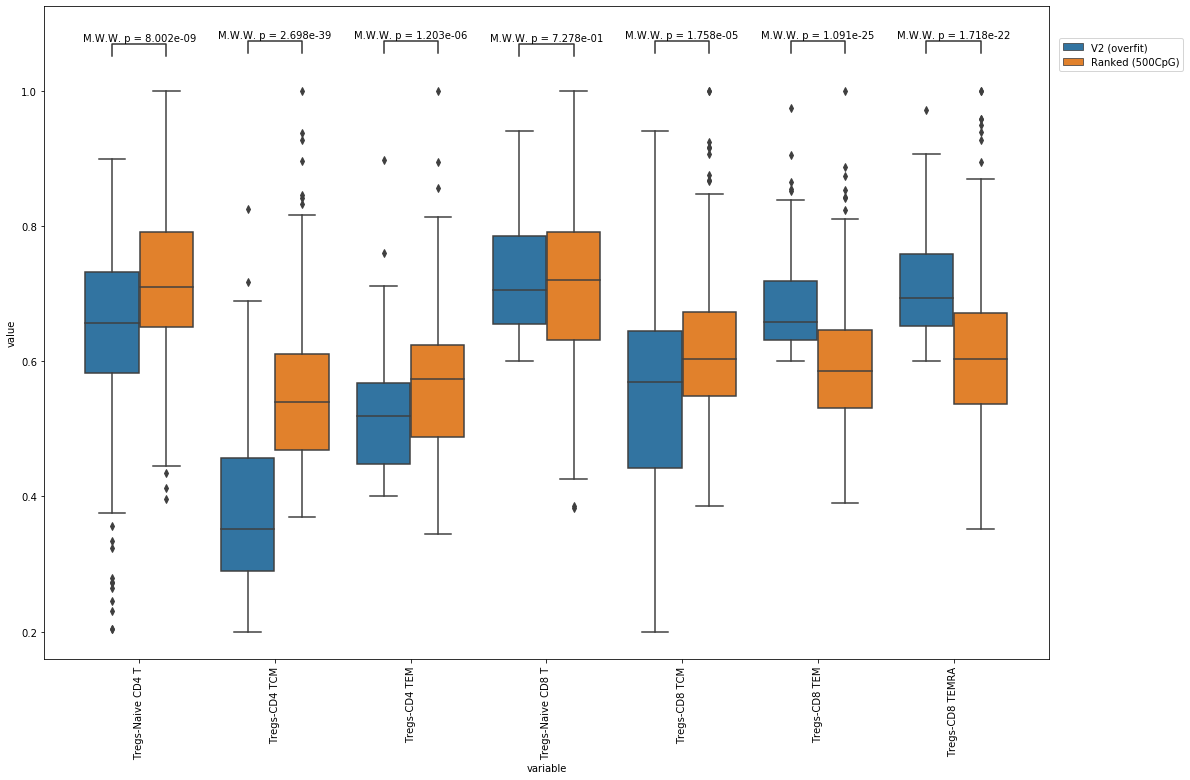

In [178]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
hue_plot_params = {
    'data': df_melted,
    'x': 'variable',
    'y': 'value',
    "hue": "SM",
}
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
ax=sns.boxplot(ax=ax, **hue_plot_params)
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.configure(test="Mann-Whitney", text_format='full').apply_and_annotate()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc=(1.01, 0.9))
plt.savefig('plot1.pdf', bbox_inches='tight')

In [179]:
allscore_cols=['Tregs-Bcell','Tregs-Myloid','Tregs-PMNlike']+scorecol

In [180]:
allscore_subset=mergedDF[allscore_cols]

In [181]:
df_meltedallscorecols = pd.melt(allscore_subset,'SM')
df_meltedallscorecols.head(10)
labels_as = np.unique(df_meltedallscorecols['SM'])

In [182]:
pairs_as = []
p_vals_dic_as = {}
for cell in np.unique(df_meltedallscorecols['variable']):
    df_sub = df_meltedallscorecols[df_meltedallscorecols['variable'] == cell]
    v1 = np.array(df_sub[df_sub['SM'] == labels[0]]['value'])
    v2 = np.array(df_sub[df_sub['SM'] == labels[1]]['value'])
    res = mannwhitneyu(v1, v2, alternative="two-sided")
    p_val = res.pvalue
    p_vals_dic_as[cell] = [p_val]
    pairs_as.append([(cell, labels_as[0]), (cell, labels_as[1])])
df_pvals_as = pd.DataFrame.from_dict(p_vals_dic_as, orient='index', columns=['p-val'])
df_pvals_as.to_csv('plot2_pvals.txt', sep='\t')

Tregs-CD8 TEMRA_V2 (overfit) vs. Tregs-CD8 TEMRA_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.718e-22 U_stat=3.669e+04
Tregs-CD8 TEM_V2 (overfit) vs. Tregs-CD8 TEM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.091e-25 U_stat=3.764e+04
Tregs-Myloid_V2 (overfit) vs. Tregs-Myloid_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:8.697e-05 U_stat=1.865e+04
Tregs-Bcell_V2 (overfit) vs. Tregs-Bcell_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:5.312e-05 U_stat=1.850e+04
Tregs-PMNlike_V2 (overfit) vs. Tregs-PMNlike_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:4.191e-04 U_stat=1.917e+04
Tregs-CD4 TCM_V2 (overfit) vs. Tregs-CD4 TCM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:2.698e-39 U_stat=6.529e+03
Tregs-CD4 TEM_V2 (overfit) vs. Tregs-CD4 TEM_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:1.203e-06 U_stat=1.742e+04
Tregs-CD8 TCM_V2 (overfit) vs. Tregs-CD8 TCM_Ranked (500CpG): Mann-Whit

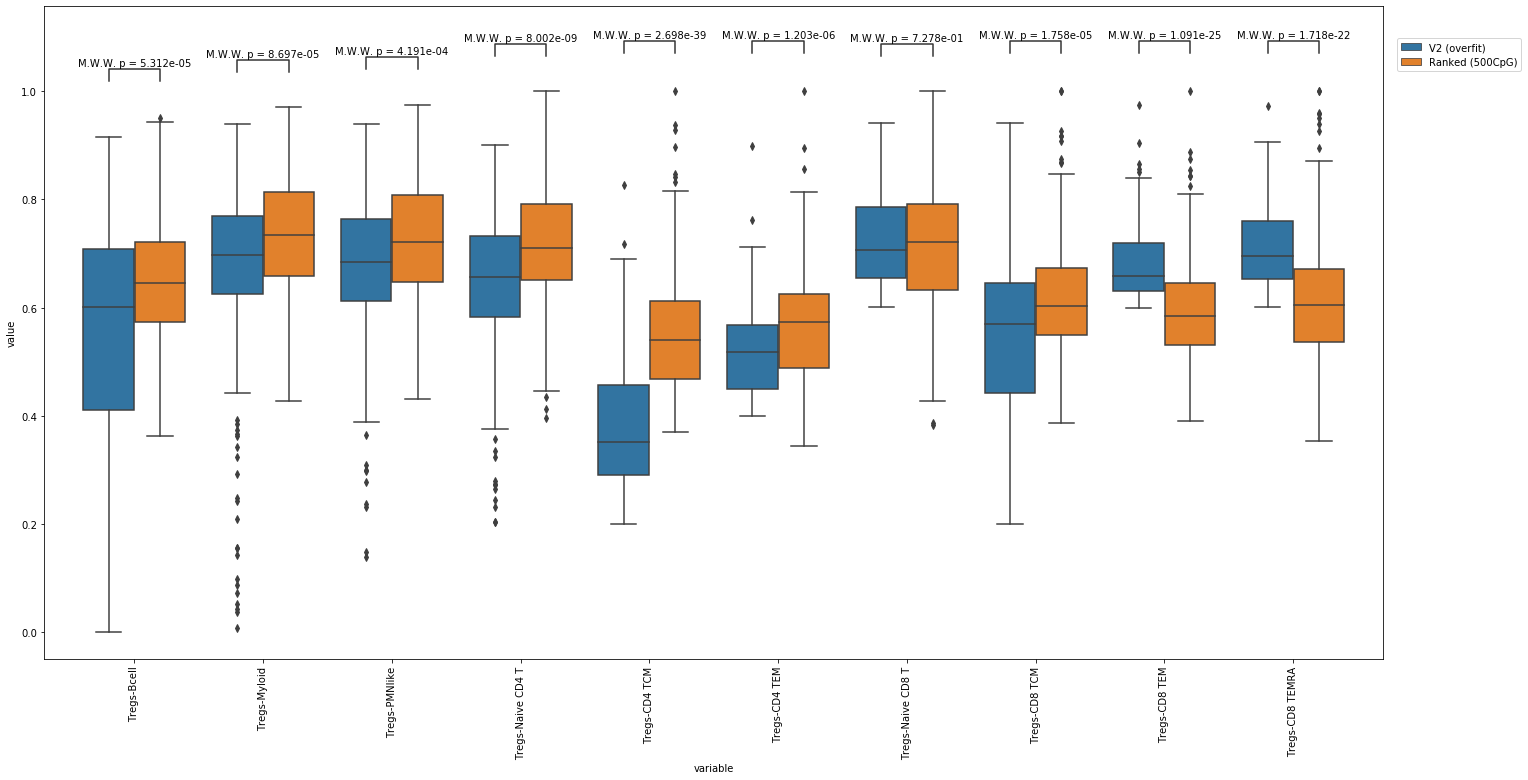

In [183]:
hue_plot_params = {
    'data': df_meltedallscorecols,
    'x': 'variable',
    'y': 'value',
    "hue": "SM",
}
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
ax=sns.boxplot(ax=ax, **hue_plot_params)
annotator = Annotator(ax, pairs_as, **hue_plot_params)
annotator.configure(test="Mann-Whitney", text_format='full').apply_and_annotate()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc=(1.01, 0.9))
plt.savefig('plot2.pdf', bbox_inches='tight')

In [184]:
justother=['Tregs-Bcell','Tregs-Myloid','Tregs-PMNlike','SM']
justother_subset=mergedDF[justother]
df_melt_othere = pd.melt(justother_subset,'SM')
df_melt_othere.head(10)
labels_ot = np.unique(df_melt_othere['SM'])

In [185]:
pairs_ot = []
p_vals_dic_ot = {}
for cell in np.unique(df_melt_othere['variable']):
    df_sub = df_melt_othere[df_melt_othere['variable'] == cell]
    v1 = np.array(df_sub[df_sub['SM'] == labels[0]]['value'])
    v2 = np.array(df_sub[df_sub['SM'] == labels[1]]['value'])
    res = mannwhitneyu(v1, v2, alternative="two-sided")
    p_val = res.pvalue
    p_vals_dic_ot[cell] = [p_val]
    pairs_ot.append([(cell, labels_ot[0]), (cell, labels_ot[1])])
df_pvals_ot = pd.DataFrame.from_dict(p_vals_dic_ot, orient='index', columns=['p-val'])
df_pvals_ot.to_csv('plot3_pvals.txt', sep='\t')

Tregs-Myloid_V2 (overfit) vs. Tregs-Myloid_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:8.697e-05 U_stat=1.865e+04
Tregs-Bcell_V2 (overfit) vs. Tregs-Bcell_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:5.312e-05 U_stat=1.850e+04
Tregs-PMNlike_V2 (overfit) vs. Tregs-PMNlike_Ranked (500CpG): Mann-Whitney-Wilcoxon test two-sided, P_val:4.191e-04 U_stat=1.917e+04


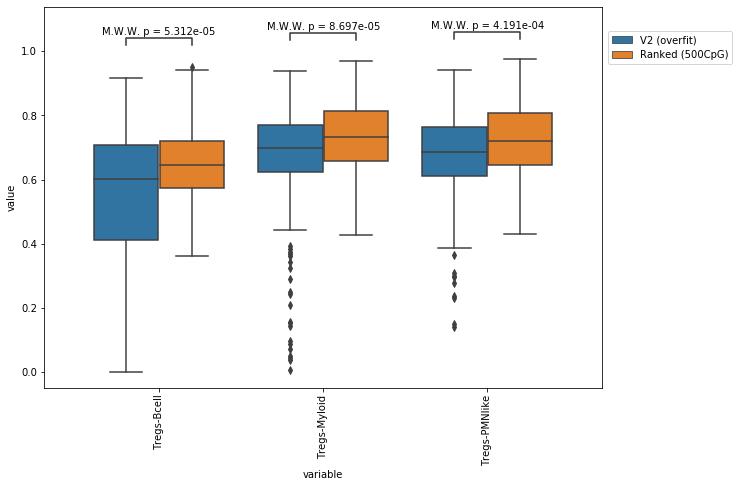

In [186]:
hue_plot_params = {
    'data': df_melt_othere,
    'x': 'variable',
    'y': 'value',
    "hue": "SM",
}
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax=sns.boxplot(ax=ax, **hue_plot_params)
annotator = Annotator(ax, pairs_ot, **hue_plot_params)
annotator.configure(test="Mann-Whitney", text_format='full').apply_and_annotate()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc=(1.01, 0.85))
plt.savefig('plot3.pdf', bbox_inches='tight')